   Unnamed: 0  ano_trabalho nível_experiência tipo_emprego              Cargo  \
0           0          2023            JUNIOR    Full-time  Applied Scientist   
1           1          2023            JUNIOR    Full-time  Applied Scientist   
2           2          2023            JUNIOR    Full-time  Applied Scientist   
3           3          2023            JUNIOR    Full-time  Applied Scientist   
4           4          2023            JUNIOR    Full-time        ML Engineer   

   salário salário_moeda tamanho da empresa Código    Nome do País  
0   213660           USD             GRANDE     US  Estados Unidos  
1   130760           USD             GRANDE     US  Estados Unidos  
2   204620           USD             GRANDE     US  Estados Unidos  
3   110680           USD             GRANDE     US  Estados Unidos  
4   163196           USD              Medio     US  Estados Unidos  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 10 co

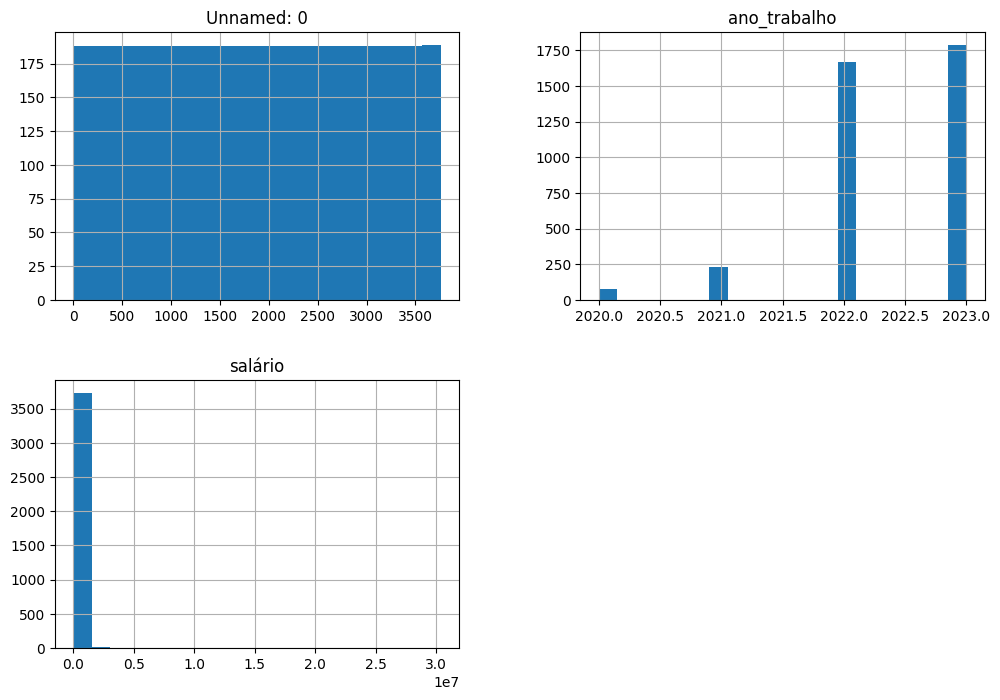

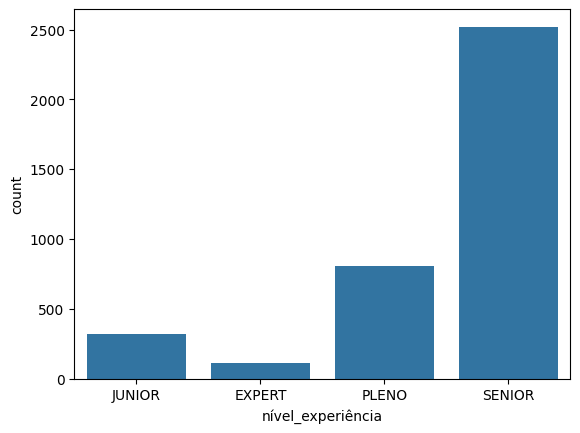

<ipython-input-2-328f57772626>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


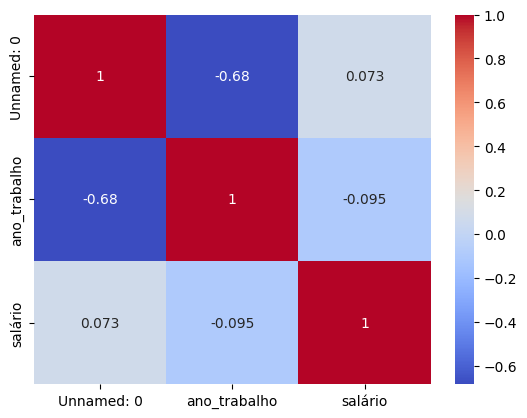

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd

# Carregando o conjunto de dados do URL fornecido
url = "https://raw.githubusercontent.com/JennPlothow/Verejo/main/dados_sal.csv"
dados = pd.read_csv(url)

# Exibindo as primeiras linhas do conjunto de dados para entender a estrutura
print(dados.head())




In [ ]:
# Obtendo informações sobre os tipos de dados e valores ausentes
print(dados.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3761 non-null   int64 
 1   ano_trabalho        3761 non-null   int64 
 2   nível_experiência   3761 non-null   object
 3   tipo_emprego        3761 non-null   object
 4   Cargo               3761 non-null   object
 5   salário             3761 non-null   int64 
 6   salário_moeda       3761 non-null   object
 7   tamanho da empresa  3761 non-null   object
 8   Código              3761 non-null   object
 9   Nome do País        3761 non-null   object
dtypes: int64(3), object(7)
memory usage: 294.0+ KB
None


In [ ]:
# Resumo estatístico das variáveis numéricas
print(dados.describe())

        Unnamed: 0  ano_trabalho       salário
count  3761.000000   3761.000000  3.761000e+03
mean   1880.000000   2022.374103  1.905999e+05
std    1085.851509      0.691252  6.711457e+05
min       0.000000   2020.000000  6.000000e+03
25%     940.000000   2022.000000  1.000000e+05
50%    1880.000000   2022.000000  1.375000e+05
75%    2820.000000   2023.000000  1.800000e+05
max    3760.000000   2023.000000  3.040000e+07


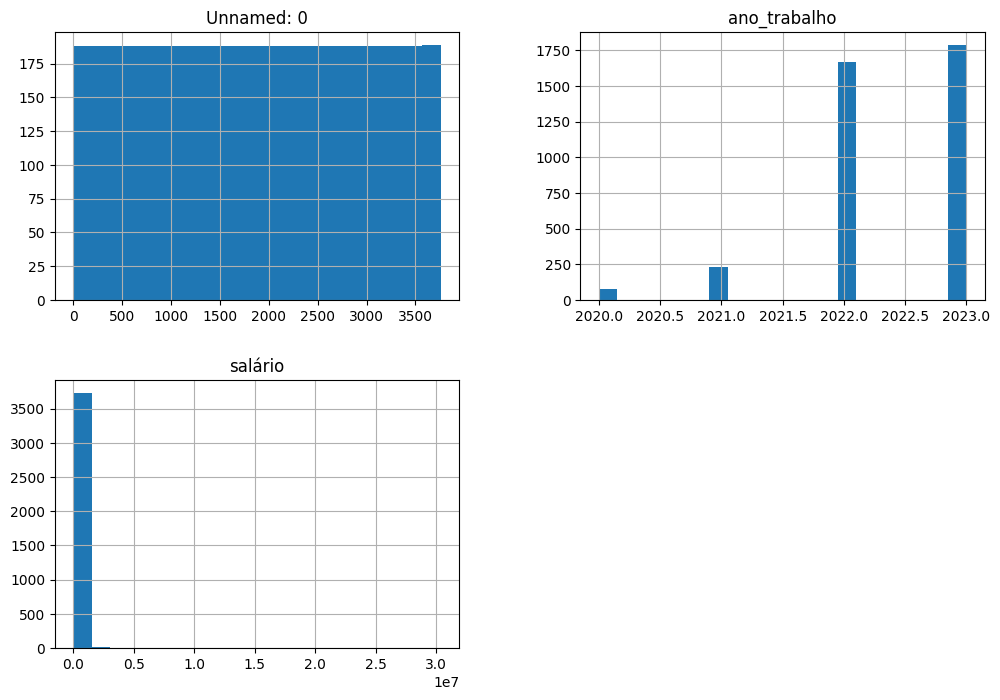

In [ ]:
# Visualizando a distribuição das variáveis numéricas
import matplotlib.pyplot as plt

dados.hist(bins=20, figsize=(12, 8))
plt.show()


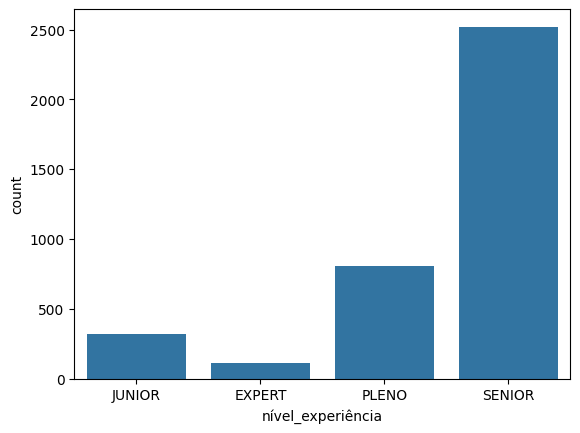

In [ ]:
# Visualizando a relação entre variáveis categóricas
import seaborn as sns
sns.countplot(x='nível_experiência', data=dados)
plt.show()

<ipython-input-7-e42b6b263713>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


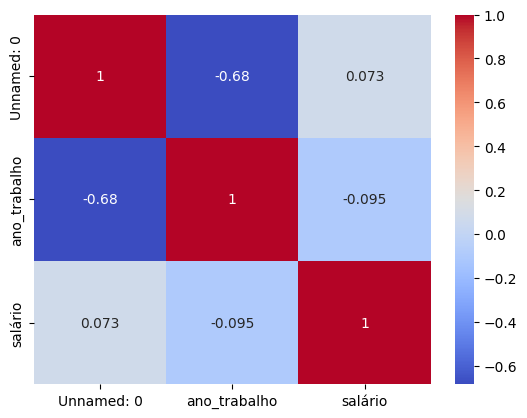

In [ ]:
# Verificando a correlação entre variáveis numéricas
correlacao = dados.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
dados

,Unnamed: 0,ano_trabalho,nível_experiência,tipo_emprego,Cargo,salário,salário_moeda,tamanho da empresa,Código,Nome do País
0,0,2023,JUNIOR,Full-time,Applied Scientist,213660,USD,GRANDE,US,Estados Unidos
1,1,2023,JUNIOR,Full-time,Applied Scientist,130760,USD,GRANDE,US,Estados Unidos
2,2,2023,JUNIOR,Full-time,Applied Scientist,204620,USD,GRANDE,US,Estados Unidos
3,3,2023,JUNIOR,Full-time,Applied Scientist,110680,USD,GRANDE,US,Estados Unidos
4,4,2023,JUNIOR,Full-time,ML Engineer,163196,USD,Medio,US,Estados Unidos
...,...,...,...,...,...,...,...,...,...,...
3756,3756,2021,PLENO,Full-time,Big Data Engineer,18000,USD,Pequeno,MD,Moldávia
3757,3757,2021,PLENO,Full-time,Data Engineer,24000,EUR,GRANDE,MT,Malta
3758,3758,2021,SENIOR,Full-time,Data Analyst,50000,USD,Pequeno,PH,Filipinas
3759,3759,2020,PLENO,Full-time,Product Data Analyst,20000,USD,Pequeno,HN,Honduras


In [ ]:
import plotly.express as px
import numpy as np

# Contagem de valores únicos na coluna 'nível_experiência'
ex_level = dados['nível_experiência'].value_counts()

# Criando o gráfico treemap
fig = px.treemap(ex_level,
                 path=[ex_level.index],
                 values=ex_level.values,
                 title='Treemap - Nível de Experiência',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

# Adicionando informações personalizadas
percents = np.round((100 * ex_level.values / sum(ex_level.values)).tolist(), 2)
fig.data[0].customdata = percents
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

# Atualizando o layout
fig.update_layout(
    font=dict(size=19, family="Franklin Gothic"))

# Exibindo o gráfico
fig.show()


No mapa de árvore acima, podemos notar que o nível Sênior/Especialista representa 46%, e o nível Médio/Intermediário é o próximo.
São apenas 4,28% de nível Expert.

Quantos cargos no conjunto de dados?

Quais são os 10 cargos mais frequentes?

In [ ]:
# Contando quantos títulos de trabalho únicos existem na coluna 'Cargo'
quantidade_titulos_trabalho = dados['Cargo'].nunique()

# Exibindo o resultado
print('Quantidade de títulos de trabalho no conjunto de dados:', quantidade_titulos_trabalho)


Quantidade de títulos de trabalho no conjunto de dados: 80


In [ ]:
import plotly.express as px

# Contando a ocorrência de cada título de trabalho
top10_job_title = dados['Cargo'].value_counts().head(10)

# Criando o gráfico de barras
fig = px.bar(x=top10_job_title.index,
             y=top10_job_title.values,
             color=top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title='Top 10 Títulos de Trabalho',
             template='plotly_dark')

# Adicionando rótulos nos eixos
fig.update_layout(xaxis_title="Títulos de Trabalho",
                  yaxis_title="Contagem",
                  font=dict(size=17, family="Franklin Gothic"))

# Exibindo o gráfico
fig.show()


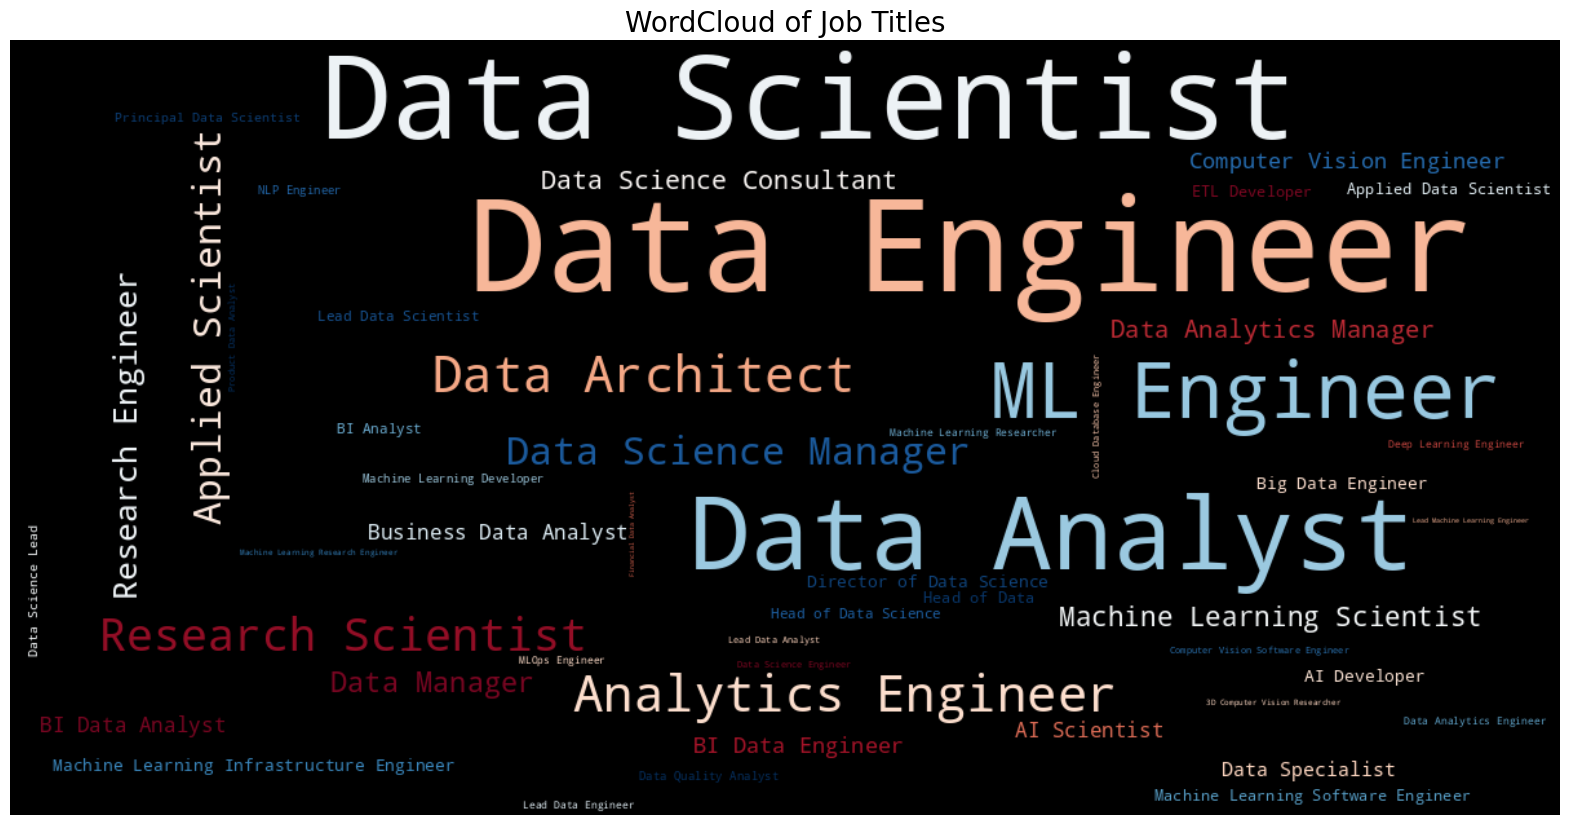

In [ ]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Certifique-se de ter o nltk e o wordcloud instalados
# !pip install nltk
# !pip install wordcloud

# Suponho que você já tenha o conjunto de dados 'dados' carregado.

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize=(20, 15))
    wc = WordCloud(width=1200,
                   height=600,
                   max_words=50,
                   colormap=colormap,
                   max_font_size=100,
                   random_state=88,
                   background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Suponho que a coluna 'job_title' existe no DataFrame 'dados'
freq_df = Freq_df(dados['Cargo'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data, 'black', 'RdBu', 'WordCloud of Job Titles')


In [ ]:
import plotly.express as px

# Contagem de tipos de emprego
type_grouped = dados['tipo_emprego'].value_counts()

# Lista de tipos de emprego
e_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

# Criando o gráfico de barras
fig = px.bar(x=e_type,
             y=type_grouped.values,
             color=type_grouped.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             template='plotly_dark',
             text=type_grouped.values,
             title='Distribuição de Tipo de Emprego')

# Atualizando o layout do gráfico
fig.update_layout(
    xaxis_title="Tipo de Emprego",
    yaxis_title="Contagem",
    font=dict(size=17, family="Franklin Gothic"))

# Ajustando a largura das barras
fig.update_traces(width=0.5)

# Exibindo o gráfico
fig.show()


In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 35.7 MB/s eta 0:00:00


In [ ]:
!pip install country-converter

In [ ]:
!pip install pycountry-convert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pycountry
import plotly.express as px

# Supondo que 'dados' seja o DataFrame que contém os dados
def convert_to_iso3(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_3
    except AttributeError:
        return None

# Aplicando a função de conversão à coluna 'Nome do País'
dados['employee_residence'] = dados['Nome do País'].apply(convert_to_iso3)

# Filtrando linhas onde a conversão foi bem-sucedida
dados = dados.dropna(subset=['employee_residence'])

# Contando a ocorrência de cada país convertido
residence = dados['employee_residence'].value_counts()

fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title='Distribuição de Localização dos Funcionários no Mapa')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()


In [ ]:
import plotly.express as px

# Supondo que 'dados' seja o DataFrame que contém os dados
top10_employee_location = residence[:10]

fig = px.bar(y=top10_employee_location.values,
             x=top10_employee_location.index,
             color=top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title='Top 10 Localizações dos Funcionários',
             template='plotly_dark')

fig.update_layout(
    xaxis_title="Localização dos Funcionários",
    yaxis_title="Contagem",
    font=dict(size=17, family="Franklin Gothic"))

fig.show()


In [ ]:
import plotly.express as px

# Supondo que 'dados' seja o DataFrame que contém os dados
grouped_size = dados['tamanho da empresa'].value_counts()

fig = px.bar(y=grouped_size.values,
             x=grouped_size.index,
             color=grouped_size.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=grouped_size.values,
             title='Distribuição do Tamanho da Empresa',
             template='plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Tamanho da Empresa",
    yaxis_title="Contagem",
    font=dict(size=17, family="Franklin Gothic"))

fig.show()


In [ ]:
import plotly.express as px

# Supondo que 'dados' seja o DataFrame que contém os dados
wkyear = dados['ano_trabalho'].value_counts()

fig = px.pie(values=wkyear.values,
             names=wkyear.index,
             color_discrete_sequence=px.colors.sequential.PuBu,
             title='Distribuição dos Anos de Trabalho',
             template='plotly_dark')

fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'gray'
fig.update_layout(
    font=dict(size=20, family="Franklin Gothic"))

fig.show()


In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Supondo que 'dados' seja o DataFrame que contém os dados
w2020 = dados.loc[(dados['ano_trabalho'] == 2020)]
w2021 = dados.loc[(dados['ano_trabalho'] == 2021)]
w2022 = dados.loc[(dados['ano_trabalho'] == 2022)]

hist_data = [w2020['salário'], w2021['salário'], w2022['salário']]
group_labels = ['2020 salary', '2021 salary', '2022 salary']
colors = ['white', 'red', 'blue']

year_salary = pd.DataFrame(columns=['2020', '2021', '2022'])
year_salary['2020'] = w2020.groupby('ano_trabalho').mean()['salário'].values
year_salary['2021'] = w2021.groupby('ano_trabalho').mean()['salário'].values
year_salary['2022'] = w2022.groupby('ano_trabalho').mean()['salário'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x=year_salary.columns,
                            y=year_salary.values.tolist()[0],
                            color=year_salary.columns,
                            color_discrete_sequence=colors,
                            title='Média Salarial por Ano de Trabalho',
                            text=np.round([num/1000 for num in year_salary.values.tolist()[0]], 2),
                            template='plotly_dark',
                            height=500))
fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='Distribuição Salarial por Ano de Trabalho', font=dict(size=17, family="Franklin Gothic"))
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Ano de Trabalho",
    yaxis_title="Média Salarial (k)",
    font=dict(size=17, family="Franklin Gothic"))

fig1.show()
fig2.show()


<ipython-input-44-3e18dfce0de4>:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-44-3e18dfce0de4>:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-44-3e18dfce0de4>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
!pip install mercury

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.0/422.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB